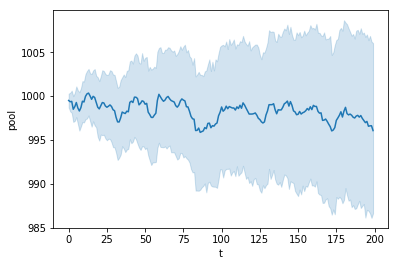

In [15]:
from blackjacksim.entities import Shoe, Player, Dealer, PlayerWallet, Blackjack32
from blackjacksim.strategies import basic
from tqdm import tnrange
from tqdm import tqdm_notebook as tqdm
import pandas as pd
import matplotlib
%matplotlib inline
import seaborn as sns

pens = [0.1, 0.25, 0.45, 0.65, 0.85, 0.95]
data = []
for _t in tnrange(1000):
    d = Dealer()
    house = Blackjack32()
    wallet = PlayerWallet(10,1000)
    p = Player(basic, wallet, house)
    s = Shoe(8,.75)
    for t in range(200):
        s = p.deal(s)
        s = d.deal(s)
        s = p.play(s, d.up_card)
        s = d.play(s, p.hands)
        for h in p.hands:
            wallet.take_payout(house.payout(h, d.hand))
        data.append({'t':t,'pool':wallet.wager_pool, 'wins':wallet.wins, 'attempts':wallet.attempts})
        if wallet.is_broke:
            break
        
df = pd.DataFrame(data)
sns.lineplot(x='t', y='pool', data=df)

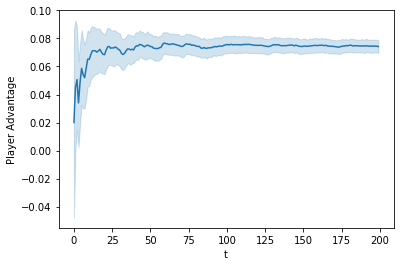

In [16]:
from matplotlib import pyplot as plt
df['Player Advantage'] = df.wins/(df.t+1)-(1-df.wins/(df.t+1))
sns.lineplot(x='t', y='Player Advantage', data=df)
